In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as st
import sympy as sy

def rdexcel(a):
    return pd.read_excel(a).as_matrix()

def plot3D(a,b):
    x,y=np.meshgrid(a,b);
    z=x**2+y**2; #write relation here
    plt.figure().add_subplot(111,projection='3d').plot_surface(x,y,z)

def syplot(eq,*argv):
    tup=tuple();
    for i in argv:
        tup=tup+tuple(i)
    sy.plotting.plot3d(eq,tup)   

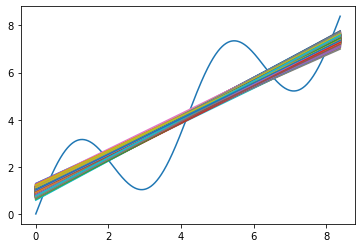

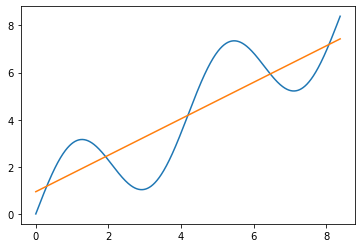

Bias = 1.1231291667359022
Variance =  0.007821709634376383
MSE =  1.702795837801811
Bias^2 + Variance =  1.702795837801811


In [2]:
#polynomial with 2 terms / underfit so mse more
k=2
pi=22/7

x=np.linspace(0,2*k*pi/1.5,1000)

mean_noise=0
var_noise=2
samples=1000

true_data=x+2*np.sin(1.5*x)
true_data=true_data.reshape(1000,1)

plt.figure()
plt.plot(x,true_data)

mean_fun = np.zeros(samples)
found_fun = []
var = np.zeros([samples,1])
mse = np.zeros([samples,1])

for i in range(samples):
    noise = np.random.normal(mean_noise,var_noise,samples)
    noise=noise.reshape(samples,1)
    y=true_data+noise
#Psudo inverse
    one=np.ones(samples).T
    X=np.vstack((one,x))
    X=X.T
    x1 = np.matmul(X.T, X)
    x1 = np.linalg.pinv(x1)
    x1 = np.matmul(x1, X.T)
    y = y.reshape((samples, 1))
    x1 = np.matmul(x1, y)
#
    line=x1[0]+x1[1]*x
    mse[i] = np.mean((true_data - line.reshape(samples,1))**2)
    found_fun.append(line)
    mean_fun = mean_fun + line
    plt.plot(x,line)
    
plt.show()
mean_fun=mean_fun/samples

plt.figure()
plt.plot(x,true_data)
plt.plot(x,mean_fun)
plt.show()

bias=np.abs(true_data-mean_fun.reshape(samples,1))
for i in range(samples):
    var[i]=np.mean((found_fun-mean_fun)**2)

print("Bias =", np.mean(bias))
print("Variance = ",np.mean(var))
print("MSE = ",np.mean(mse))
print("Bias^2 + Variance = ",np.mean(bias**2)+np.mean(var))

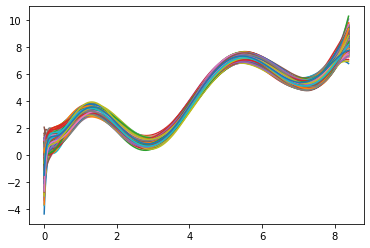

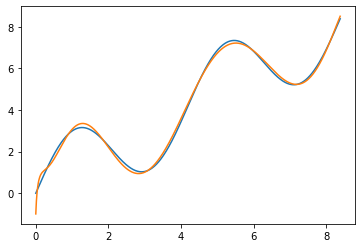

Bias = 0.10718434024532815
Variance =  0.035686966418767556
MSE =  0.052175409171284444
Bias^2 + Variance =  0.05217540917128445


In [3]:
#polynomial with 10 terms/perfectfitso mse very less
k=2
pi=22/7

x=np.linspace(0,2*k*pi/1.5,1000)

mean_noise=0
var_noise=2
samples=1000

true_data=x+2*np.sin(1.5*x)
true_data=true_data.reshape(1000,1)

plt.figure()
plt.plot(x,true_data)

mean_fun = np.zeros(samples)
found_fun = []
var = np.zeros([samples,1])
mse = np.zeros([samples,1])

for i in range(samples):
    noise = np.random.normal(mean_noise,var_noise,samples)
    noise=noise.reshape(samples,1)
    y=true_data+noise
#Psudo inverse
    one=np.ones(samples).T
    X=np.vstack((one,x))
    X=np.vstack((X,x**(3/2)))
    X=np.vstack((X,x**2))
    X=np.vstack((X,x**(5/2)))
    X=np.vstack((X,x**3))
    X=np.vstack((X,x**(7/2)))
    X=np.vstack((X,x**4))
    X=np.vstack((X,x**(9/2)))
    X=np.vstack((X,x**5))
    X=X.T
    x1 = np.matmul(X.T, X)
    x1 = np.linalg.pinv(x1)
    x1 = np.matmul(x1, X.T)
    y = y.reshape((samples, 1))
    x1 = np.matmul(x1, y)
#
    poly=x1[0]+x1[1]*x+x1[2]*(x**(3/2))+x1[3]*(x**2)+x1[4]*(x**(5/2))+x1[5]*(x**3)+x1[6]*(x**(7/2))+x1[7]*(x**4)+x1[8]*(x**(9/2))+x1[9]*(x**5)
    mse[i] = np.mean((true_data - poly.reshape(samples,1))**2)
    found_fun.append(poly)
    mean_fun = mean_fun + poly
    plt.plot(x,poly)
    
plt.show()
mean_fun=mean_fun/samples

plt.figure()
plt.plot(x,true_data)
plt.plot(x,mean_fun)
plt.show()

bias=np.abs(true_data-mean_fun.reshape(samples,1))
for i in range(samples):
    var[i]=np.mean((found_fun-mean_fun)**2)

print("Bias =", np.mean(bias))
print("Variance = ",np.mean(var))
print("MSE = ",np.mean(mse))
print("Bias^2 + Variance = ",np.mean(bias**2)+np.mean(var))

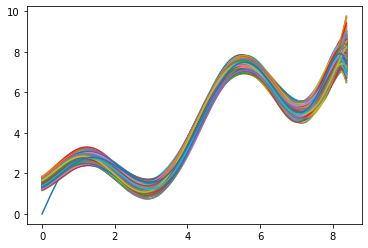

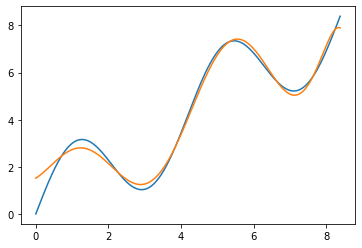

Bias = 0.1940083582381425
Variance =  0.027255681970520033
MSE =  0.10870311722782243
Bias^2 + Variance =  0.10870311722782243


In [4]:
#polynomial with 16 terms/overfitting so mse increased
k=2
pi=22/7

x=np.linspace(0,2*k*pi/1.5,1000)

mean_noise=0
var_noise=2
samples=1000

true_data=x+2*np.sin(1.5*x)
true_data=true_data.reshape(1000,1)

plt.figure()
plt.plot(x,true_data)

mean_fun = np.zeros(samples)
found_fun = []
var = np.zeros([samples,1])
mse = np.zeros([samples,1])

for i in range(samples):
    noise = np.random.normal(mean_noise,var_noise,samples)
    noise=noise.reshape(samples,1)
    y=true_data+noise
#Psudo inverse
    one=np.ones(samples).T
    X=np.vstack((one,x))
    X=np.vstack((X,x**(3/2)))
    X=np.vstack((X,x**2))
    X=np.vstack((X,x**(5/2)))
    X=np.vstack((X,x**3))
    X=np.vstack((X,x**(7/2)))
    X=np.vstack((X,x**4))
    X=np.vstack((X,x**(9/2)))
    X=np.vstack((X,x**5))
    X=np.vstack((X,x**(11/2)))
    X=np.vstack((X,x**6))
    X=np.vstack((X,x**(13/2)))
    X=np.vstack((X,x**7))
    X=np.vstack((X,x**(15/2)))
    X=np.vstack((X,x**8))
    X=X.T
    x1 = np.matmul(X.T, X)
    x1 = np.linalg.pinv(x1)
    x1 = np.matmul(x1, X.T)
    y = y.reshape((samples, 1))
    x1 = np.matmul(x1, y)
#
    poly=x1[0]+x1[1]*x+x1[2]*(x**(3/2))+x1[3]*(x**2)+x1[4]*(x**(5/2))+x1[5]*(x**3)+x1[6]*(x**(7/2))+x1[7]*(x**4)+x1[8]*(x**(9/2))+x1[9]*(x**5)+x1[10]*(x**(11/2))+x1[11]*(x**6)+x1[12]*(x**(13/2))+x1[13]*(x**7)+x1[14]*(x**(15/2))+x1[15]*(x**8)
    mse[i] = np.mean((true_data - poly.reshape(samples,1))**2)
    found_fun.append(poly)
    mean_fun = mean_fun + poly
    plt.plot(x,poly)
    
plt.show()
mean_fun=mean_fun/samples

plt.figure()
plt.plot(x,true_data)
plt.plot(x,mean_fun)
plt.show()

bias=np.abs(true_data-mean_fun.reshape(samples,1))
for i in range(samples):
    var[i]=np.mean((found_fun-mean_fun)**2)

print("Bias =", np.mean(bias))
print("Variance = ",np.mean(var))
print("MSE = ",np.mean(mse))
print("Bias^2 + Variance = ",np.mean(bias**2)+np.mean(var))